Your task is to predict the median house price in boston.
You can study about the dataset using this kaggle link https://www.kaggle.com/datasets/vikrishnan/boston-house-prices.
You may see how others worked on this dataset but I encourage you to make your own code to practice on data analysis and machine learning development.

Objective: The objective of this homework is to practice the end-to-end machine learning
development process, including data exploration, model building, and result summary.

Task: Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# 2. Data Exploration

In [44]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [20]:
category = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('/content/drive/MyDrive/Year 2/regression/housing.csv',delimiter=r"\s+",header=None)

dataset.columns = category
# this assigns the name of each column to be according to the data in the "category" list
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
dataset.info()
# to view information about the dataset such as the number of entries, rows, columns, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
dataset.describe()
# this helps provide an overview of the data including the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the columns.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset.isna().sum()
# check for missing values, if it returns 0 then there is no missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = dataset.corr()

<Axes: >

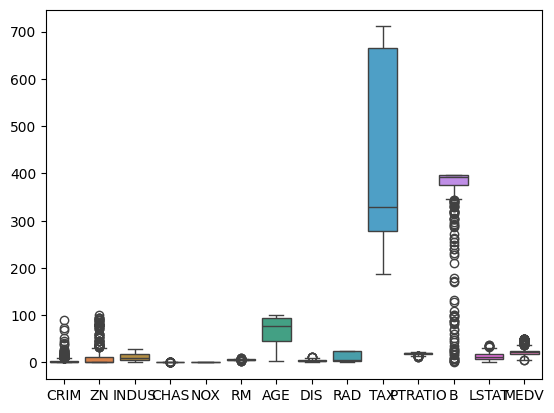

In [24]:
sns.boxplot(data=dataset)
# to show summary of data distribution, outliers, and comparing each group.

<Axes: >

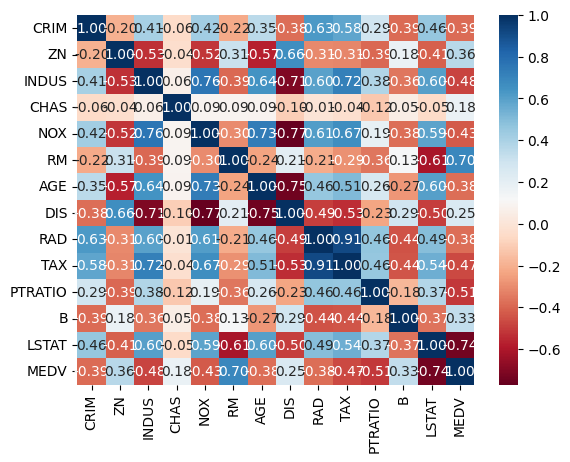

In [12]:
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f")
# by showing our data through a heatmap, it can help us identify relationships, patterns, and see which information is important.

In [32]:
scalar = MinMaxScaler()
print(scalar.fit(dataset))
DataScaled = scalar.fit_transform(dataset)
DataScaled = pd.DataFrame(DataScaled, columns= category)

summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
CRIM     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
ZN       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
INDUS    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
CHAS     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
NOX      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
RM       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
AGE      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
DIS      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
RAD      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
TAX      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
PTRATIO  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
B        506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
LSTAT    5

In [29]:
#from this we can drop out data that is not important or show low correlation which is CHAS
#prepare data for a supervised learning task
x = dataset.drop(columns=['CHAS','MEDV'],axis=1)
y = dataset['MEDV']

# Model Building

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("Mean Squared Error (Linear Regression):",mse)

Mean Squared Error (Linear Regression): 5.84912408378666


In [52]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train, y_train)
y_pred_tree = tree_reg.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print("Mean Squared Error (Decision Tree):", mse)

Mean Squared Error (Decision Tree): 5.665625625250065


# Results Summary

In [55]:
# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_linear = np.sqrt(mse_linear)
rmse_tree = np.sqrt(mse_tree)

# Compare models
print("Linear Regression:")
print("RMSE:", rmse_linear)
print()
print("Decision Tree Regression:")
print("RMSE:", rmse_tree)
print()

# Compare models
if rmse_linear < rmse_tree:
    print("Linear Regression performs better.")
elif rmse_linear > rmse_tree:
    print("Decision Tree Regression performs better.")
else:
    print("Both models perform equally.")


Linear Regression:
RMSE: 5.84912408378666

Decision Tree Regression:
RMSE: 5.665625625250065

Decision Tree Regression performs better.
